In [1]:
import seaborn as sns
#available dataset
import matplotlib.pyplot as plt
import pandas as pd

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:
#data overview
data = sns.load_dataset('diamonds')
print("print top 5 data")
print(data.head(100))
print("===the info ===")
print(data.info())
print("===the describe ===")
print(data.describe())
print("==check for null values")
print(data.isnull().sum())


print top 5 data
    carat        cut color clarity  depth  table  price     x     y     z
0    0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1    0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2    0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3    0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4    0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
..    ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
95   0.70       Good     E     VS2   57.5   58.0   2759  5.85  5.90  3.38
96   0.70       Good     F     VS1   59.4   62.0   2759  5.71  5.76  3.40
97   0.96       Fair     F     SI2   66.3   62.0   2759  6.27  5.95  4.07
98   0.73  Very Good     E     SI1   61.6   59.0   2760  5.77  5.78  3.56
99   0.80    Premium     H     SI1   61.5   58.0   2760  5.97  5.93  3.66

[100 rows x 10 columns]
===the info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5394

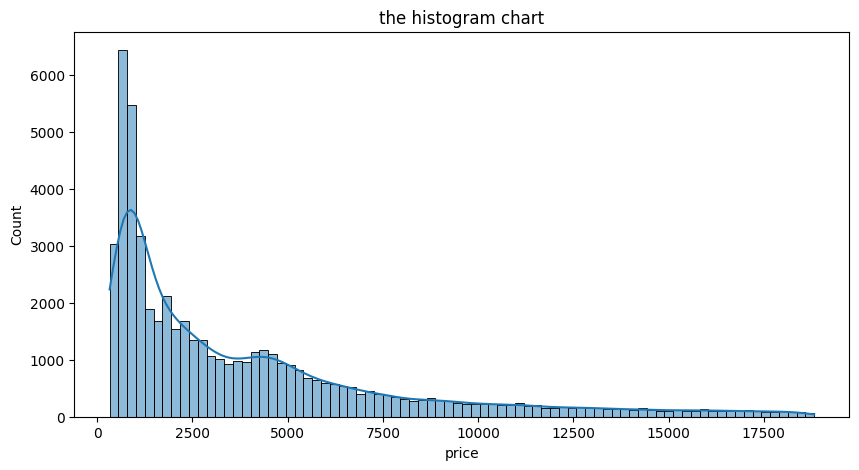

In [31]:
#univariate analysis
#histogram analysis
plt.figure(figsize=(10,5))
sns.histplot(data['price']  , kde=True)
plt.title("the histogram chart")
plt.show()


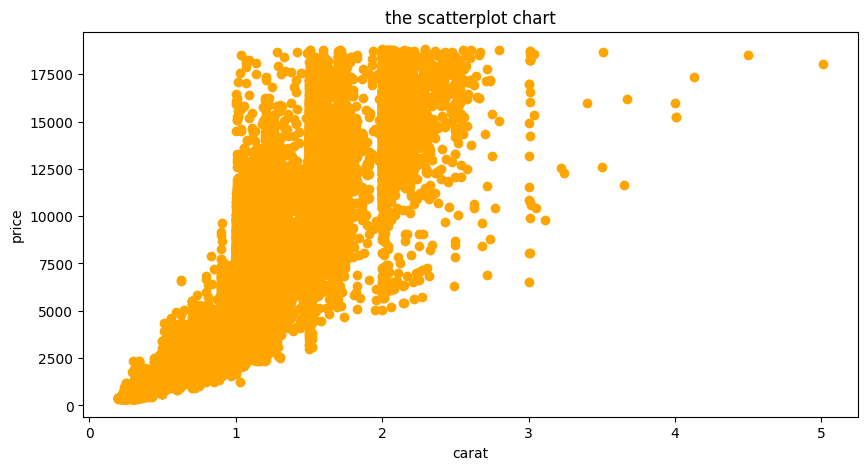

In [5]:
#scatter plots
plt.figure(figsize=(10,5))
plt.scatter(data['carat'] , data['price'] , color = "orange")
plt.title("the scatterplot chart")
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

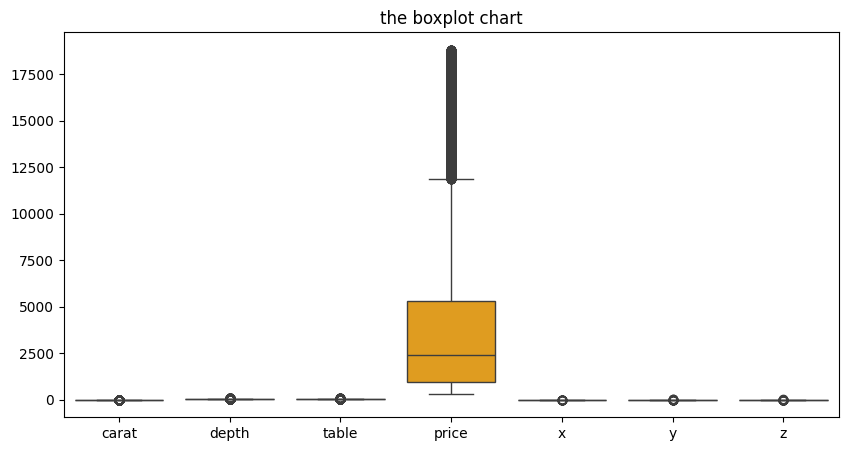

In [6]:
#box plot
plt.figure(figsize=(10,5))
sns.boxplot(data, color = "orange")
plt.title("the boxplot chart")
plt.show()

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


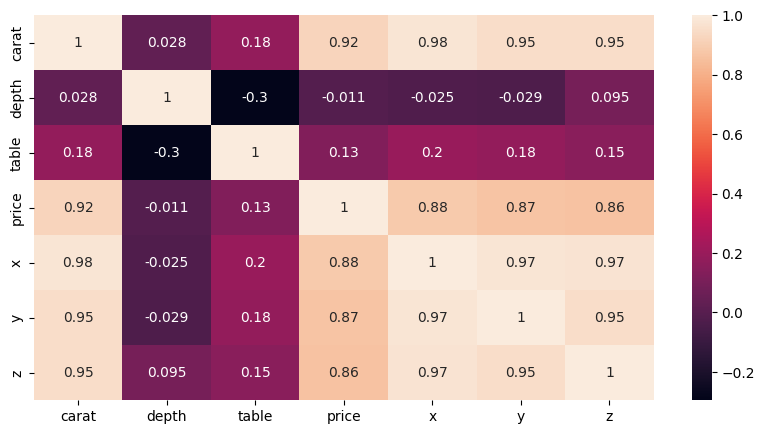

In [7]:
#correlation analysis

#compute correlation matrix
corr = data.corr(numeric_only=True)
print(corr)
plt.figure(figsize=(10,5))
sns.heatmap(corr , annot=True)
plt.show()

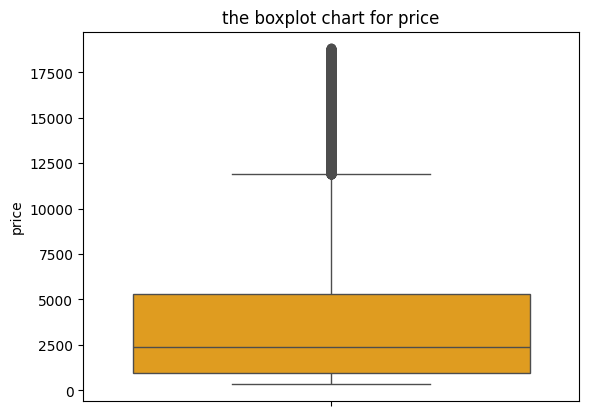

In [16]:

#box plot for price

sns.boxplot(data, y = 'price' , color = "orange")
plt.title("the boxplot chart for price")
plt.show()

In [20]:
# Outlier removal using IQR method
# IQR - Interquartile Range
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Get the values between lower bound and upper bound
cleaned_data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

print(cleaned_data)
print(cleaned_data.describe())


Lower bound: -5611.375
Upper bound: 11885.625
       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[50400 rows x 10 columns]
   

In [27]:
columns_to_clean = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

for col in columns_to_clean:
    q1 = cleaned_data[col].quantile(0.25)
    q3 = cleaned_data[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the data
    cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

print("\nData after cleaning outliers for specified columns:")
print(cleaned_data.describe())




Data after cleaning outliers for specified columns:
              carat         depth         table         price             x  \
count  43063.000000  43063.000000  43063.000000  43063.000000  43063.000000   
mean       0.669517     61.849639     57.063084   2742.961429      5.452029   
std        0.340505      1.012646      1.829857   2287.645303      0.928181   
min        0.200000     59.300000     53.000000    326.000000      3.730000   
25%        0.360000     61.200000     56.000000    862.000000      4.580000   
50%        0.560000     61.900000     57.000000   1851.000000      5.300000   
75%        1.000000     62.500000     58.000000   4258.000000      6.330000   
max        1.950000     64.400000     61.000000   9355.000000      8.100000   

                  y             z  
count  43063.000000  43063.000000  
mean       5.457735      3.373924  
std        0.922629      0.575893  
min        3.680000      1.530000  
25%        4.580000      2.820000  
50%        5.310000

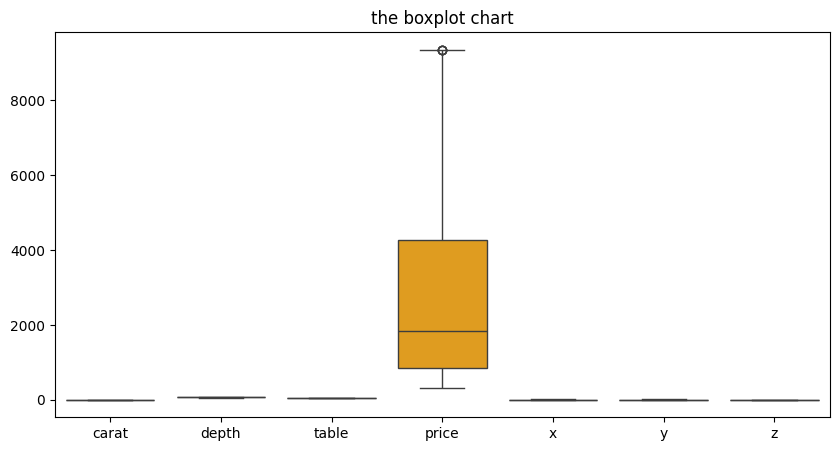

In [28]:
#box plot for cleaned data
plt.figure(figsize=(10,5))
sns.boxplot(data=cleaned_data, color = "orange")
plt.title("the boxplot chart")
plt.show()

          carat     depth     table     price         x         y         z
carat  1.000000  0.058213  0.189341  0.931878  0.987660  0.986649  0.986860
depth  0.058213  1.000000 -0.184015  0.030949  0.012582  0.010636  0.109516
table  0.189341 -0.184015  1.000000  0.152033  0.182465  0.176791  0.161717
price  0.931878  0.030949  0.152033  1.000000  0.914880  0.915471  0.912436
x      0.987660  0.012582  0.182465  0.914880  1.000000  0.998426  0.994156
y      0.986649  0.010636  0.176791  0.915471  0.998426  1.000000  0.993933
z      0.986860  0.109516  0.161717  0.912436  0.994156  0.993933  1.000000


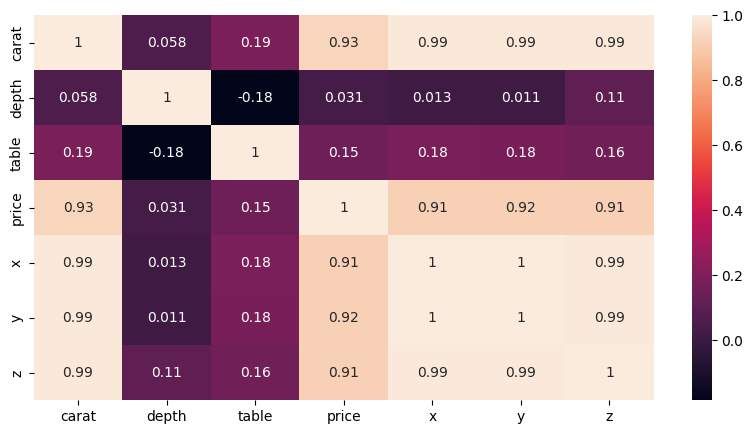

In [29]:
#7.correlation after outlier
corr_cleaned = cleaned_data.corr(numeric_only=True)
print(corr_cleaned)
plt.figure(figsize=(10,5))
sns.heatmap(corr_cleaned , annot=True)
plt.show()